In [36]:
from sklearn.preprocessing import StandardScaler

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pprint

import regressor_models

In [37]:
attempts = 0
while attempts < 100:
    try:
        data_folder = input("Enter the datasets you wish to use: ")
        # if data_folder == "all":
            # make dictionary with input and output of all datasets
        inpu = sio.loadmat(f"data/{data_folder}/Train_text.mat")
        mat_input = inpu["final_output"]
        inpu_validation = sio.loadmat(f"data/{data_folder}/Test_text.mat")
        mat_input_validation = inpu_validation["final_output"]
        break
    except:
        attempts += 1
        print("Invalid file name, please choose one of the following")
        print("egemaps, emobase_feature, emobase_feature_large, text, text_large, word_embedding, all")

In [38]:
number_of_features = mat_input.shape[1] - 1
Actual_number_of_input = number_of_features - 1

# Regression data
X = mat_input[:, 0:Actual_number_of_input]
print(X)
y = mat_input[:, number_of_features]

scaler = StandardScaler()
# scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)

X_validation = mat_input_validation[:, 0:Actual_number_of_input]
X_validation = scaler.transform(X_validation)
validation_identifier = mat_input_validation[:, number_of_features]

[[1.419686e+01 1.539400e+04 7.706000e+03 ... 4.942265e+02 3.783813e+05
  3.301918e+02]
 [1.018445e+01 1.351700e+04 0.000000e+00 ... 2.220334e+02 8.819448e+04
  1.363451e+02]
 [5.246719e+00 7.540000e+02 0.000000e+00 ... 3.134014e+02 1.746217e+05
  1.926266e+02]
 ...
 [7.946273e+00 2.188000e+03 0.000000e+00 ... 4.183046e+02 2.773812e+05
  2.767163e+02]
 [1.070572e+01 3.760000e+02 9.270000e+02 ... 5.127012e+02 4.191356e+05
  3.354324e+02]
 [8.472637e+00 7.230000e+02 0.000000e+00 ... 3.990472e+02 2.697365e+05
  2.504014e+02]]


In [39]:
regressor_models.linear_regressor(X, y, X_validation, validation_identifier)
regressor_models.random_forest_regressor(X, y, X_validation, validation_identifier)
regressor_models.mlp_regressor(X, y, X_validation, validation_identifier)
regressor_models.sgd_regressor(X, y, X_validation, validation_identifier)
regressor_models.gradient_boosting_regressor(X, y, X_validation, validation_identifier)

C:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Iteration 1, loss = 291.84564978
Iteration 2, loss = 271.20931051
Iteration 3, loss = 258.33425841
Iteration 4, loss = 249.33485670
Iteration 5, loss = 241.94937493
Iteration 6, loss = 235.37170909
Iteration 7, loss = 229.26629280
Iteration 8, loss = 223.47663017
Iteration 9, loss = 217.92005817
Iteration 10, loss = 212.58314835
Iteration 11, loss = 207.55461208
Iteration 12, loss = 202.78746424
Iteration 13, loss = 198.18700448
Iteration 14, loss = 193.89107412
Iteration 15, loss = 189.94252477
Iteration 16, loss = 186.18979467
Iteration 17, loss = 182.68395552
Iteration 18, loss = 179.52390597
Iteration 19, loss = 176.48019579
Iteration 20, loss = 173.62536892
Iteration 21, loss = 171.09703511
Iteration 22, loss = 168.76980581
Iteration 23, loss = 166.55818432
Iteration 24, loss = 164.43538519
Iteration 25, loss = 162.49747597
Iteration 26, loss = 160.62556743
Iteration 27, loss = 158.85959149
Iteration 28, loss = 157.15589952
Iteration 29, loss = 155.52871168
Iteration 30, loss = 15

C:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


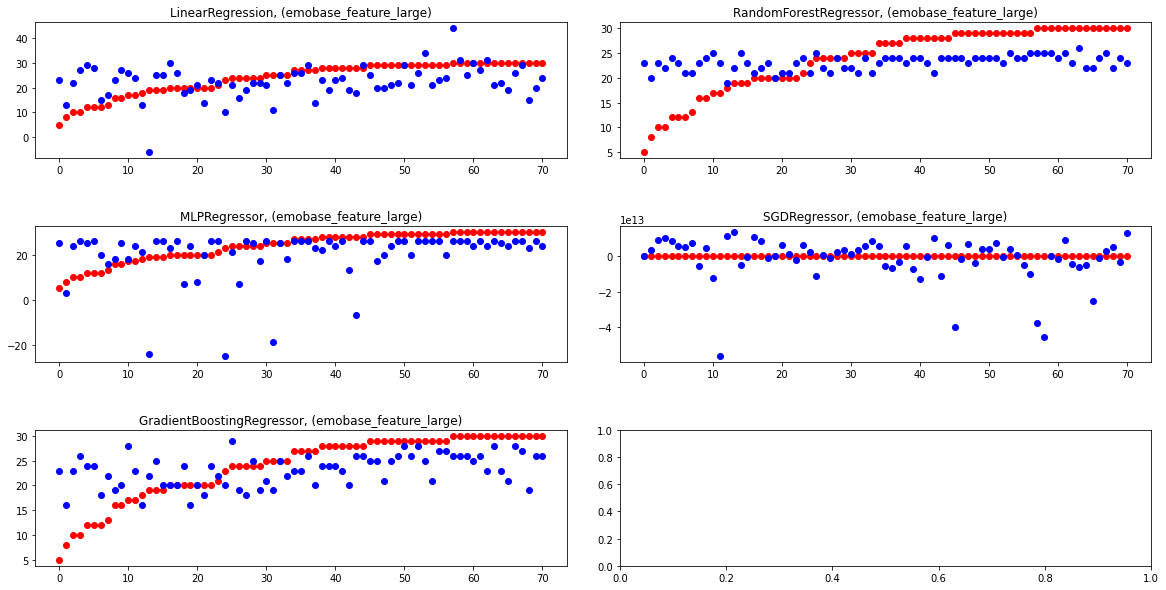

In [40]:
# Subject predict and actual difference
fig, axs = plt.subplots(3,2, figsize=(20, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.1)

axs = axs.ravel()
graph_counter = 0

for k in regressor_models.results_dict:
    prediction = regressor_models.results_dict[k]["Pred"]
    actual = regressor_models.results_dict[k]["Actual"]

    try:
        arr1inds = actual.argsort()
        actual = actual[arr1inds]
        prediction = prediction[arr1inds]
        x_coordinates = np.arange(prediction.size)
        axs[graph_counter].scatter(x_coordinates, actual, color='red')
        axs[graph_counter].scatter(x_coordinates, prediction, color="blue")
        axs[graph_counter].set_title(f"{k}, ({data_folder})")
        graph_counter += 1
    except:
        print(k)
        pass

In [41]:
hidden = {"Pred", "Actual"}

for k in regressor_models.results_dict:
    pprint.pprint(k)
    pprint.pprint({x: regressor_models.results_dict[k][x] for x in regressor_models.results_dict[k] if x not in hidden})

'LinearRegression'
{'CCC': 0.19510642876438242,
 'MSE': 69.74647887323944,
 'Pearson R': {'R': 0.20026217274797165, 'p-value': 0.09403301844649367}}
'RandomForestRegressor'
{'CCC': 0.17829824740121972,
 'MSE': 36.80281690140845,
 'Pearson R': {'R': 0.41829406777655737, 'p-value': 0.00028342588271964463}}
'MLPRegressor'
{'CCC': 0.12269921862083674,
 'MSE': 152.6338028169014,
 'Pearson R': {'R': 0.15088710491742008, 'p-value': 0.20910311642556112}}
'SGDRegressor'
{'CCC': -2.0545038864027463e-13,
 'MSE': 1.6181145301268155e+26,
 'Pearson R': {'R': -0.20353648715973763, 'p-value': 0.08866951415002935}}
'GradientBoostingRegressor'
{'CCC': 0.3181954055629457,
 'MSE': 36.19718309859155,
 'Pearson R': {'R': 0.40174540350803645, 'p-value': 0.0005154213429801049}}


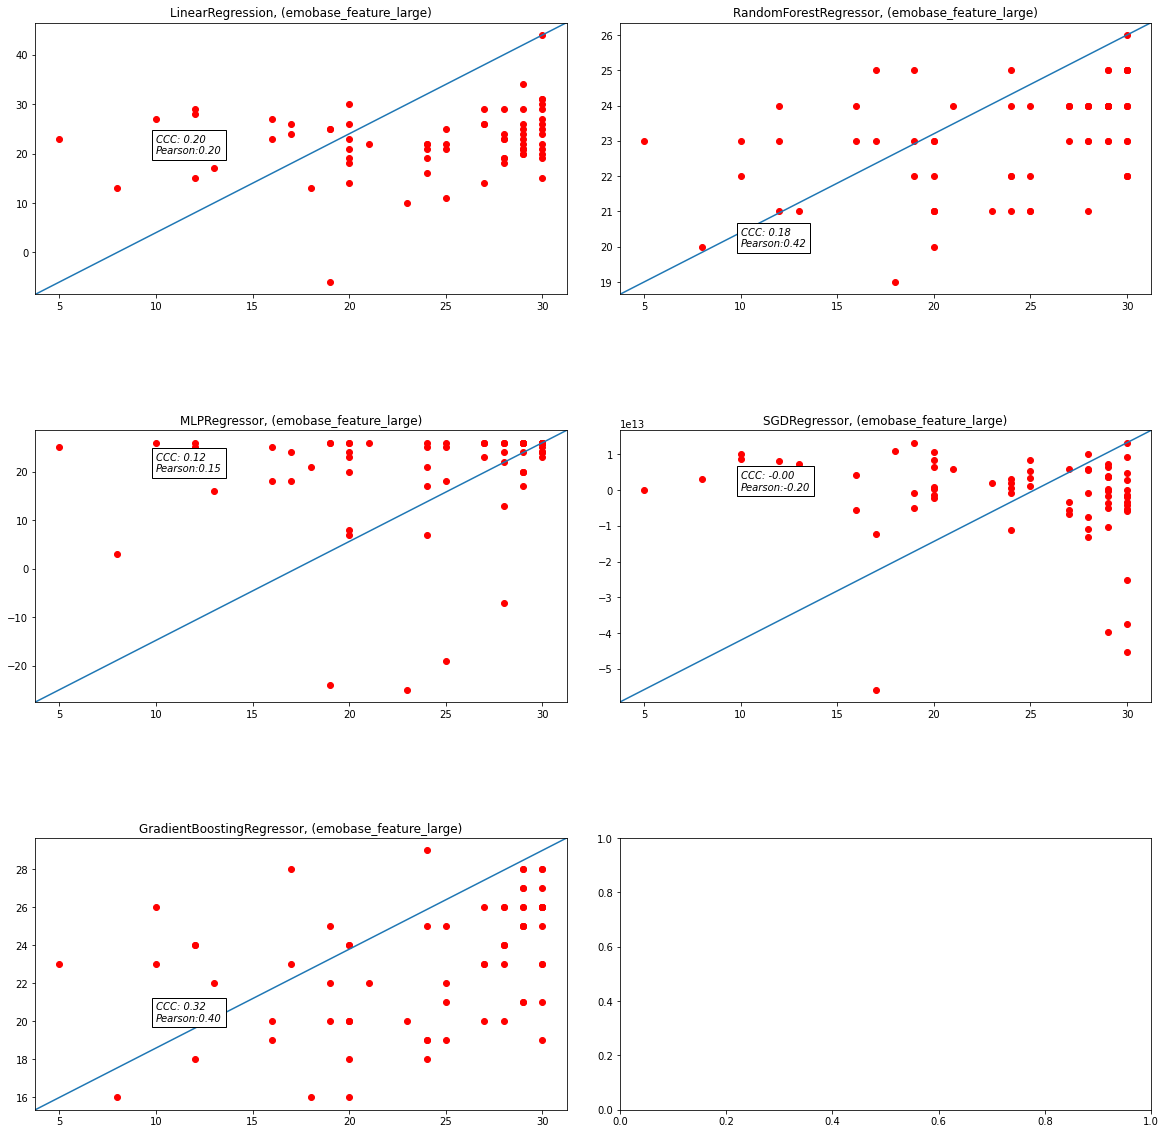

In [42]:
# Predicted vs actual equivalence
fig, axs = plt.subplots(3,2, figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.1)

axs = axs.ravel()
graph_counter = 0

for k in regressor_models.results_dict:
    prediction = regressor_models.results_dict[k]["Pred"]
    actual = regressor_models.results_dict[k]["Actual"]
    ccc = regressor_models.results_dict[k]["CCC"]
    pearson = regressor_models.results_dict[k]["Pearson R"]

    try:
        axs[graph_counter].scatter(actual, prediction, color='red')
        axs[graph_counter].set_title(f"{k}, ({data_folder})")
        axs[graph_counter].plot([0,1],[0,1], transform=axs[graph_counter].transAxes)
        axs[graph_counter].text(10, 20, f'CCC: {ccc:.2f}\nPearson:{pearson["R"]:.2f}', style='italic', bbox={'facecolor': 'white'})
        graph_counter += 1
    except:
        print(k)
        pass